# Welcome to Numpy!

Numpy is a numerical computing library in Python.  It provides $n$ dimensional arrays, several useful array generation methods, linear algebra techniques, and much more.  It is a cornerstone in the Python scientific computing ecosystem.

Today we'll cover a range of methods that Numpy provides, and even do some exploratory data analysis.  Some of the topics we'll cover include:  
* array creation methods
* array selection and manipulation
* methods from `numpy.linalg`
* `scipy.sparse` matrices if time permits

In [15]:
import numpy as np # common abbreviation
import matplotlib.pyplot as plt # common abbreviation

#   Tells matplotlib to use the inline backend, which allows plots to be
#   rendered in the notebook.
%matplotlib inline

#   Sets up some matplotlib parameters telling it to set a larger figure size,
#   as well as use LaTeX for figure captions, titles, legend texts, etc...
#
#   We include the figure dpi setting so that our LaTeX looks nice, otherwise
#   we run into some ugly pixelation artifacts.
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

#   Often it's useful to have deterministic randomness in notebooks
np.random.seed(1000)

## Array Creation

Often times one would like to create different types of matrices rather than generating everything by hand.  Numpy provides several ways of creating arrays, from creating linearly spaced ranges to creating random matrices of arbitrary sizes.

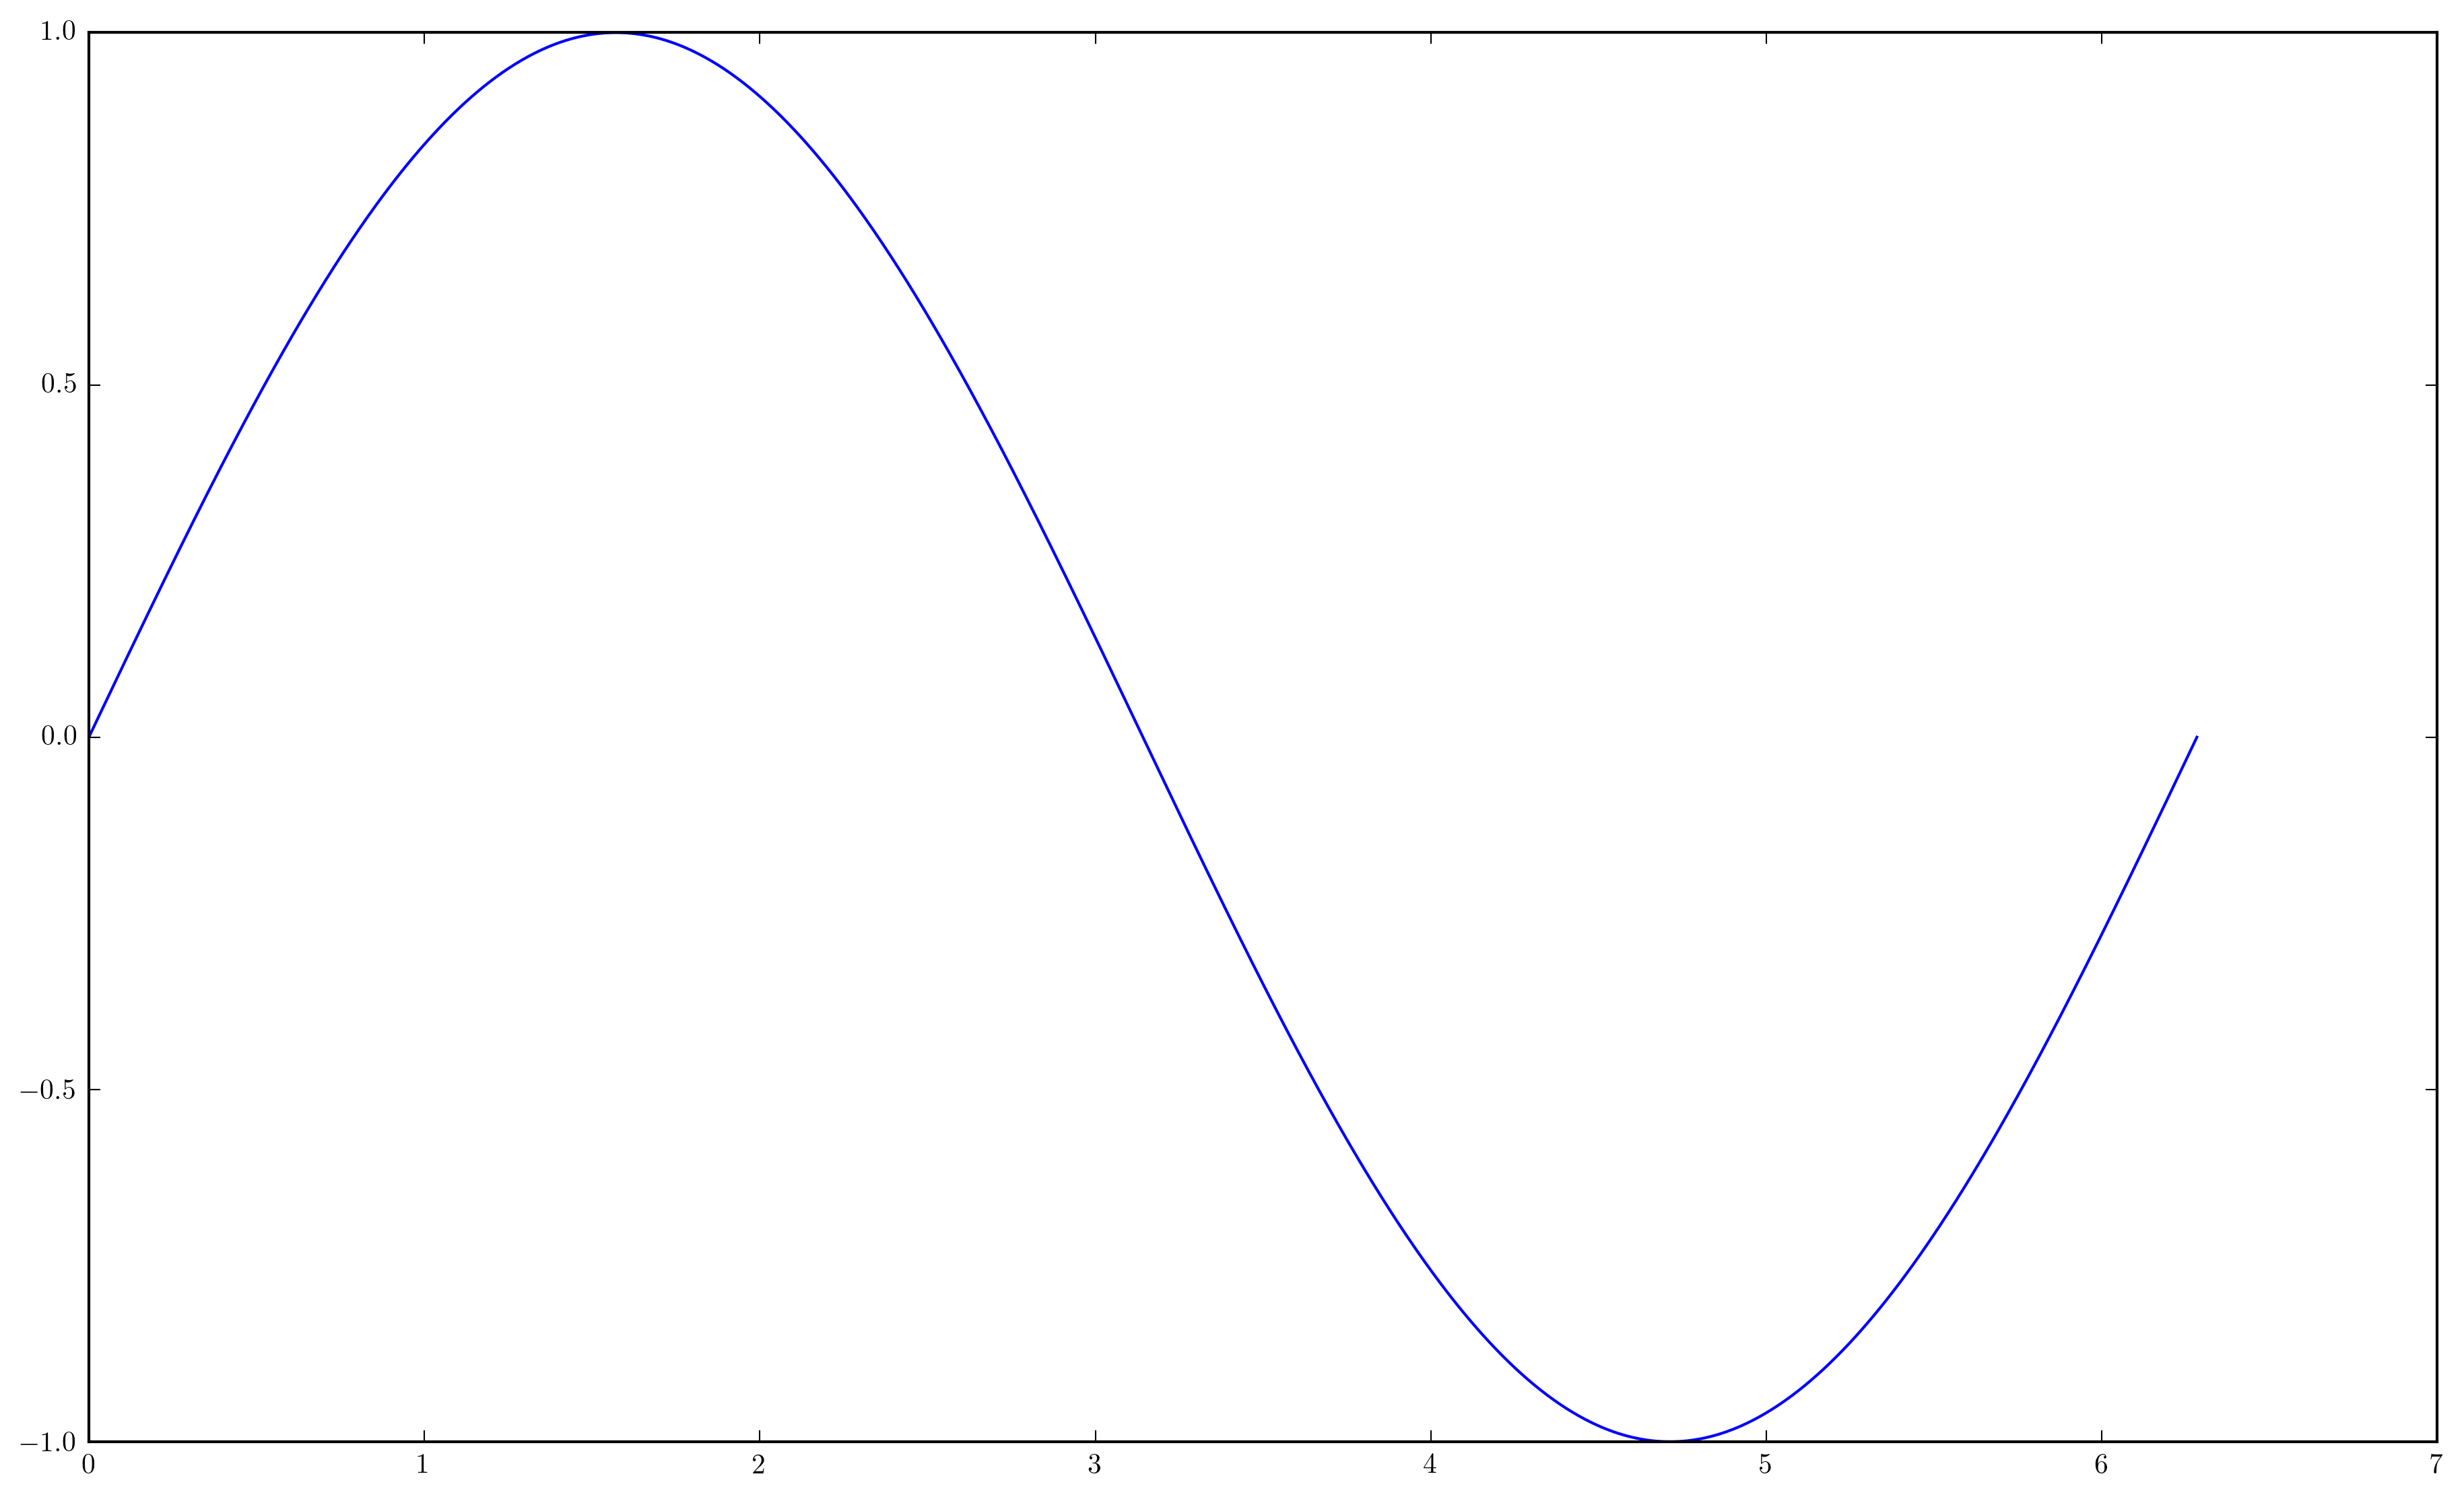

In [16]:
#   An example of a linearly spaced range that provides a whole period of a sinusoid
#   Method signature:
#       np.linspace(start, end, # of steps to take)
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)
plt.plot(x, y)
plt.show()

Note that the start and end bounds are inclusive:

In [17]:
print("Bounds: [{}, {:1.0f}pi]".format(np.min(x), np.max(x)/np.pi))

Bounds: [0.0, 2pi]


Other useful array creations:

In [18]:
def describe_matrix(matrix, name):
    """
    Prints out some nice information regarding the matrix.
    """
    
    print('{} shape: {}\n'.format(name, matrix.shape))
    print('{}:\n{}'.format(name, matrix))

In [19]:
#   Random matrix of arbitrary shape:
random_matrix = np.random.rand(2, 3)
describe_matrix(random_matrix, 'random_matrix')

random_matrix shape: (2, 3)

random_matrix:
[[ 0.65358959  0.11500694  0.95028286]
 [ 0.4821914   0.87247454  0.21233268]]


In [20]:
#   Matrix of all ones
ones = np.ones((4, 6))
describe_matrix(ones, 'ones')

ones shape: (4, 6)

ones:
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]


In [21]:
#   Matrix of all zeros
zeros = np.zeros((5,7))
describe_matrix(zeros, 'zeros')

zeros shape: (5, 7)

zeros:
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [22]:
#   Ranges and Diagonals
a_range = np.arange(0, 20, 4)
diagonal_matrix = np.diag(a_range)
describe_matrix(diagonal_matrix, 'diagonal_matrix')

diagonal_matrix shape: (5, 5)

diagonal_matrix:
[[ 0  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 16]]


##   Simulating random data

In [23]:
def random_deviance(vector):
    """
    Takes the values and vector and adds a random value to each element
    taken from the distribution N(vector_i, vector_i), so that we have
    a higher variance for larger 
    """
    
    return np.random.normal(vector, vector)

In [24]:
random_array = np.vstack([random_deviance(np.arange(100)) for i in range(1000)])

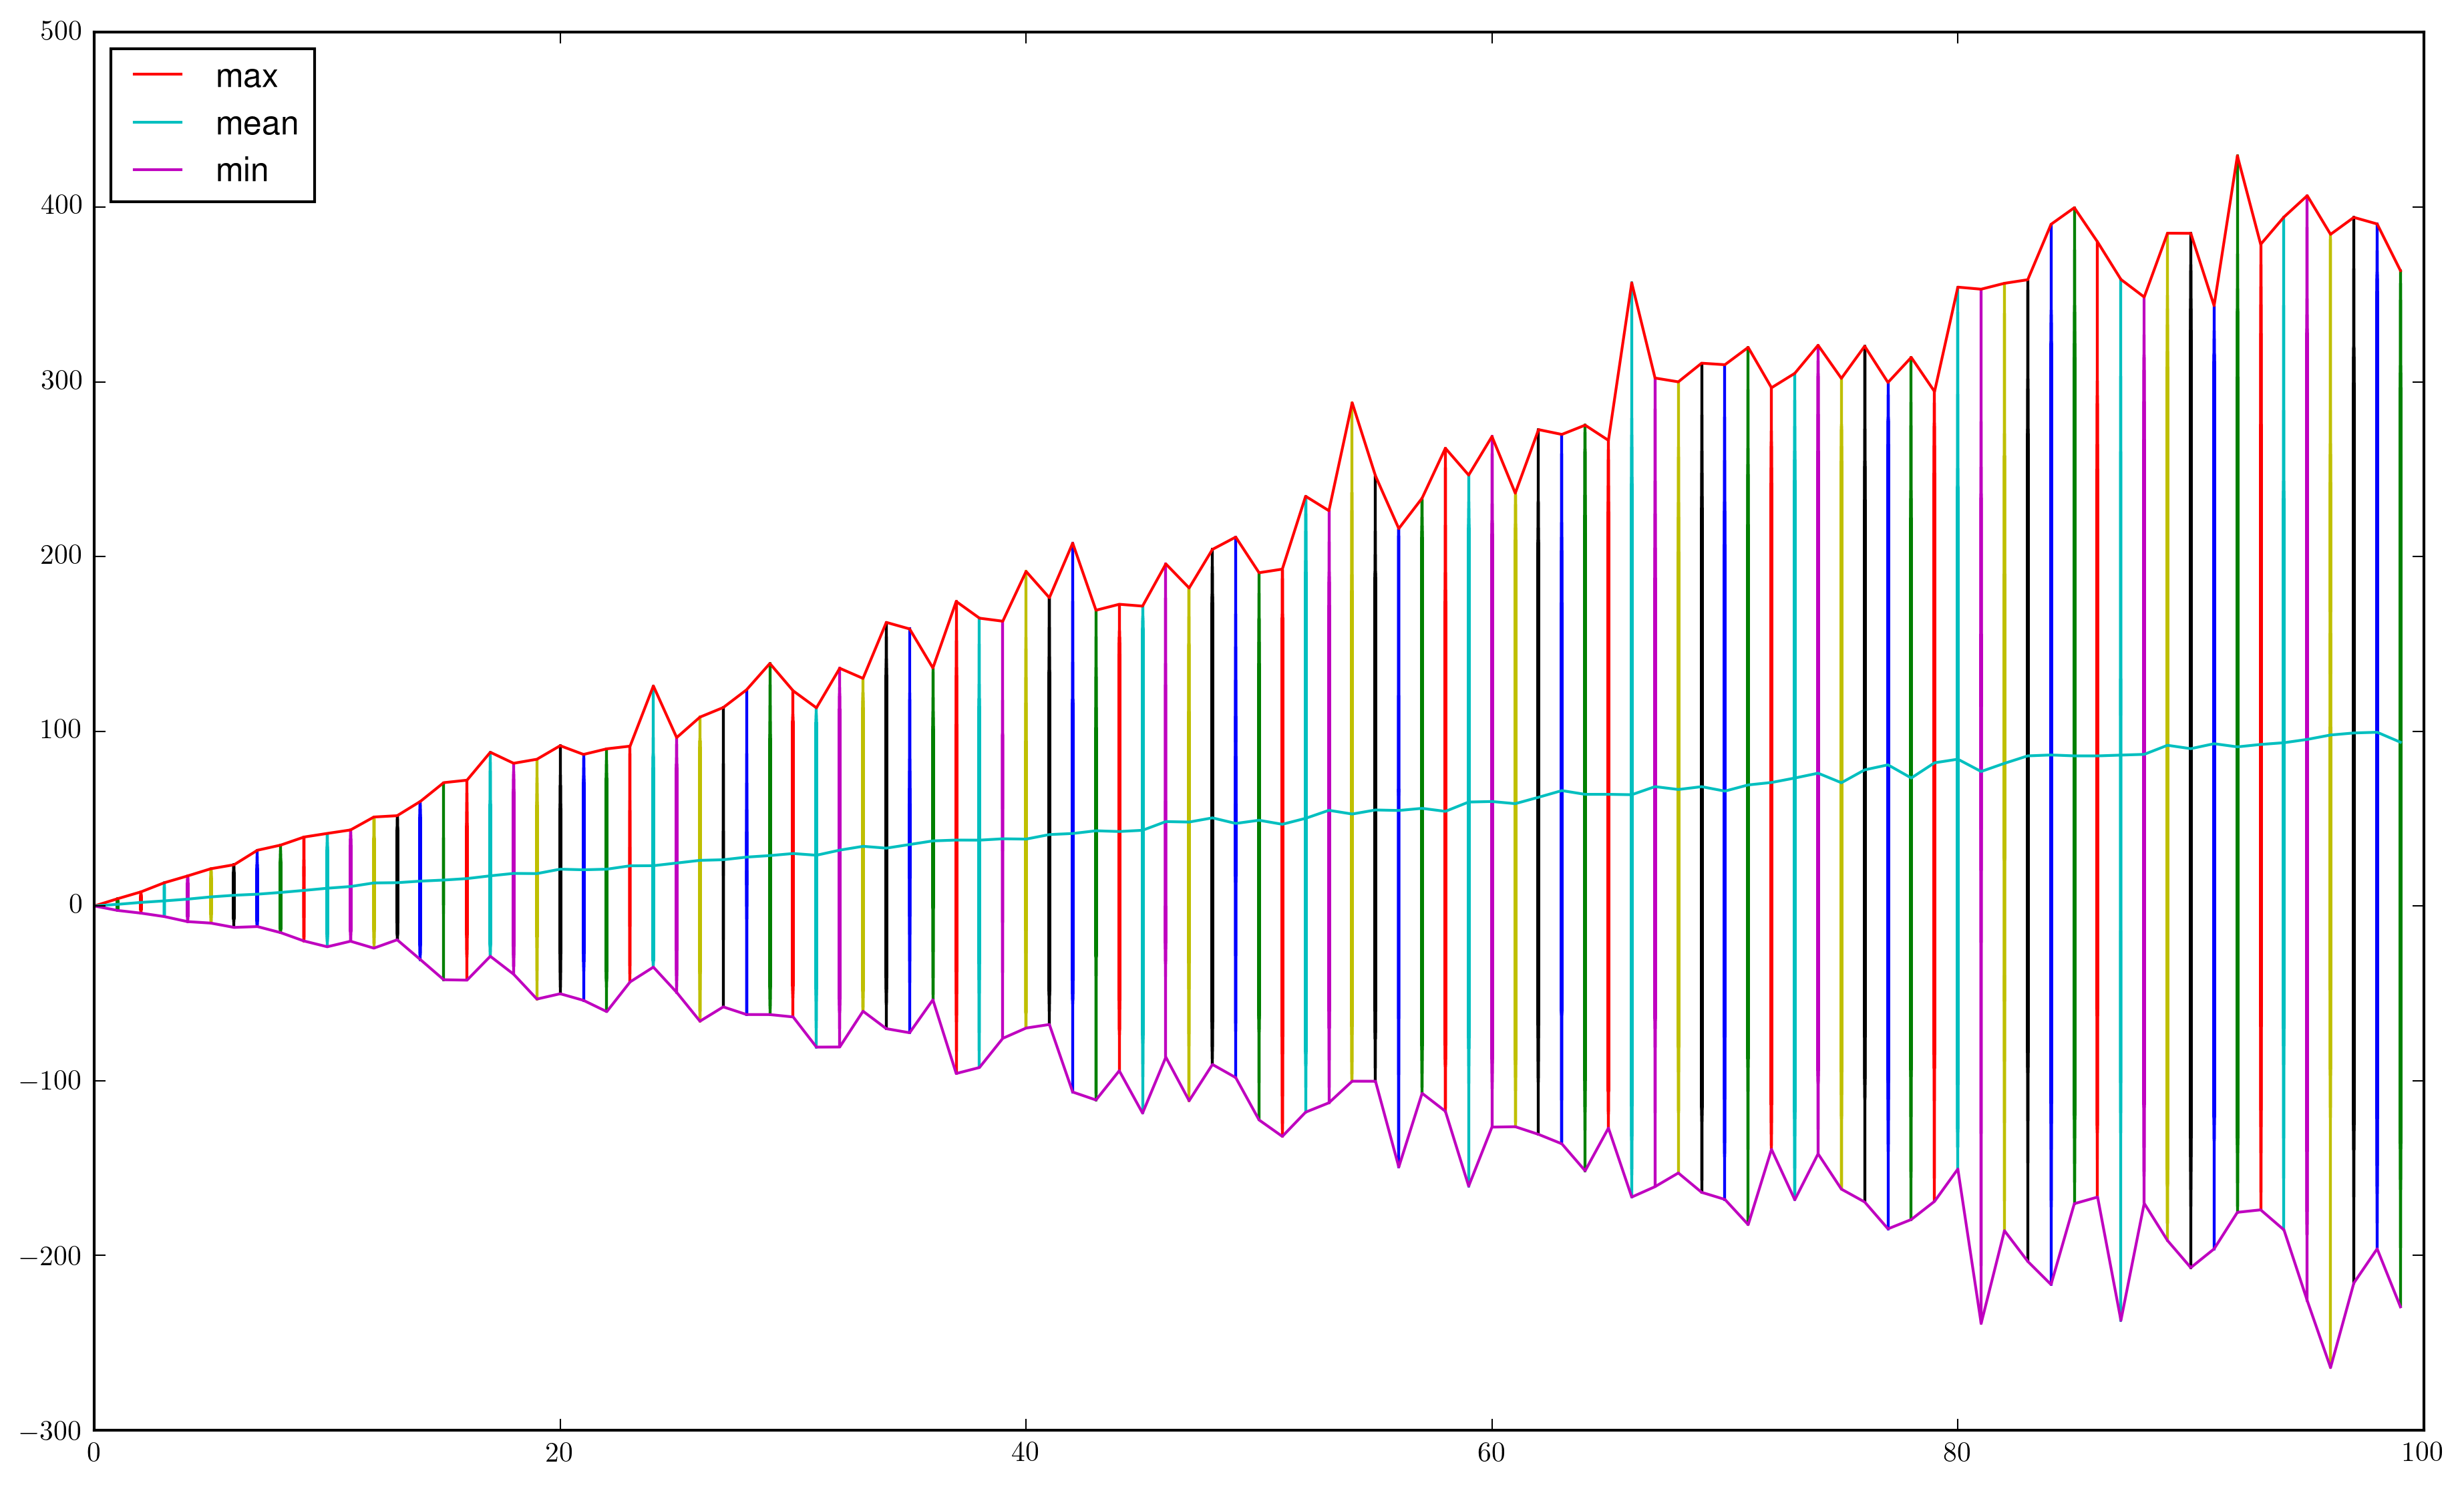

In [25]:
plt.plot(np.vstack([np.arange(100)]*1000), random_array)
plt.plot(np.arange(100), np.max(random_array, axis=0), label="max")
plt.plot(np.arange(100), np.mean(random_array, axis=0), label="mean")
plt.plot(np.arange(100), np.min(random_array, axis=0), label="min")

plt.legend(loc = 'upper left')

plt.show()

## Array Selection and Manipulation

Numpy provides lots of useful array selection techniques:

In [26]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['target', 'DESCR', 'data', 'target_names', 'feature_names'])

In [49]:
labels = np.array([ iris['target_names'][target_index] for target_index in iris['target'] ])
labels[::50]

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [50]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

So we have 4 Dimensions, let's plot 4 3D Plots.

In [95]:
index = np.array([1, 1, 1, 0]).astype(bool)
index_array = np.array([np.roll(index, shift) for shift in range(4)])
plot_arrays = [iris['data'][:, index_row].T for index_row in index_array]
print('{}, {}'.format(len(plot_arrays), plot_arrays[0].shape))

4, (3, 150)


In [85]:
plot_features = [np.array(iris['feature_names'])[index_row] for index_row in index_array]
plot_features

[array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
       dtype='<U17'),
 array(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
       dtype='<U17'),
 array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
       dtype='<U17'),
 array(['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)'],
       dtype='<U17')]

In [107]:
colors = ['r', 'g', 'b']
colormap = dict(zip(np.unique(labels), colors))
color_labels = list(map(lambda key: colormap[key], labels))

/home/gvacaliuc/.virtualenvs/pythonml/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


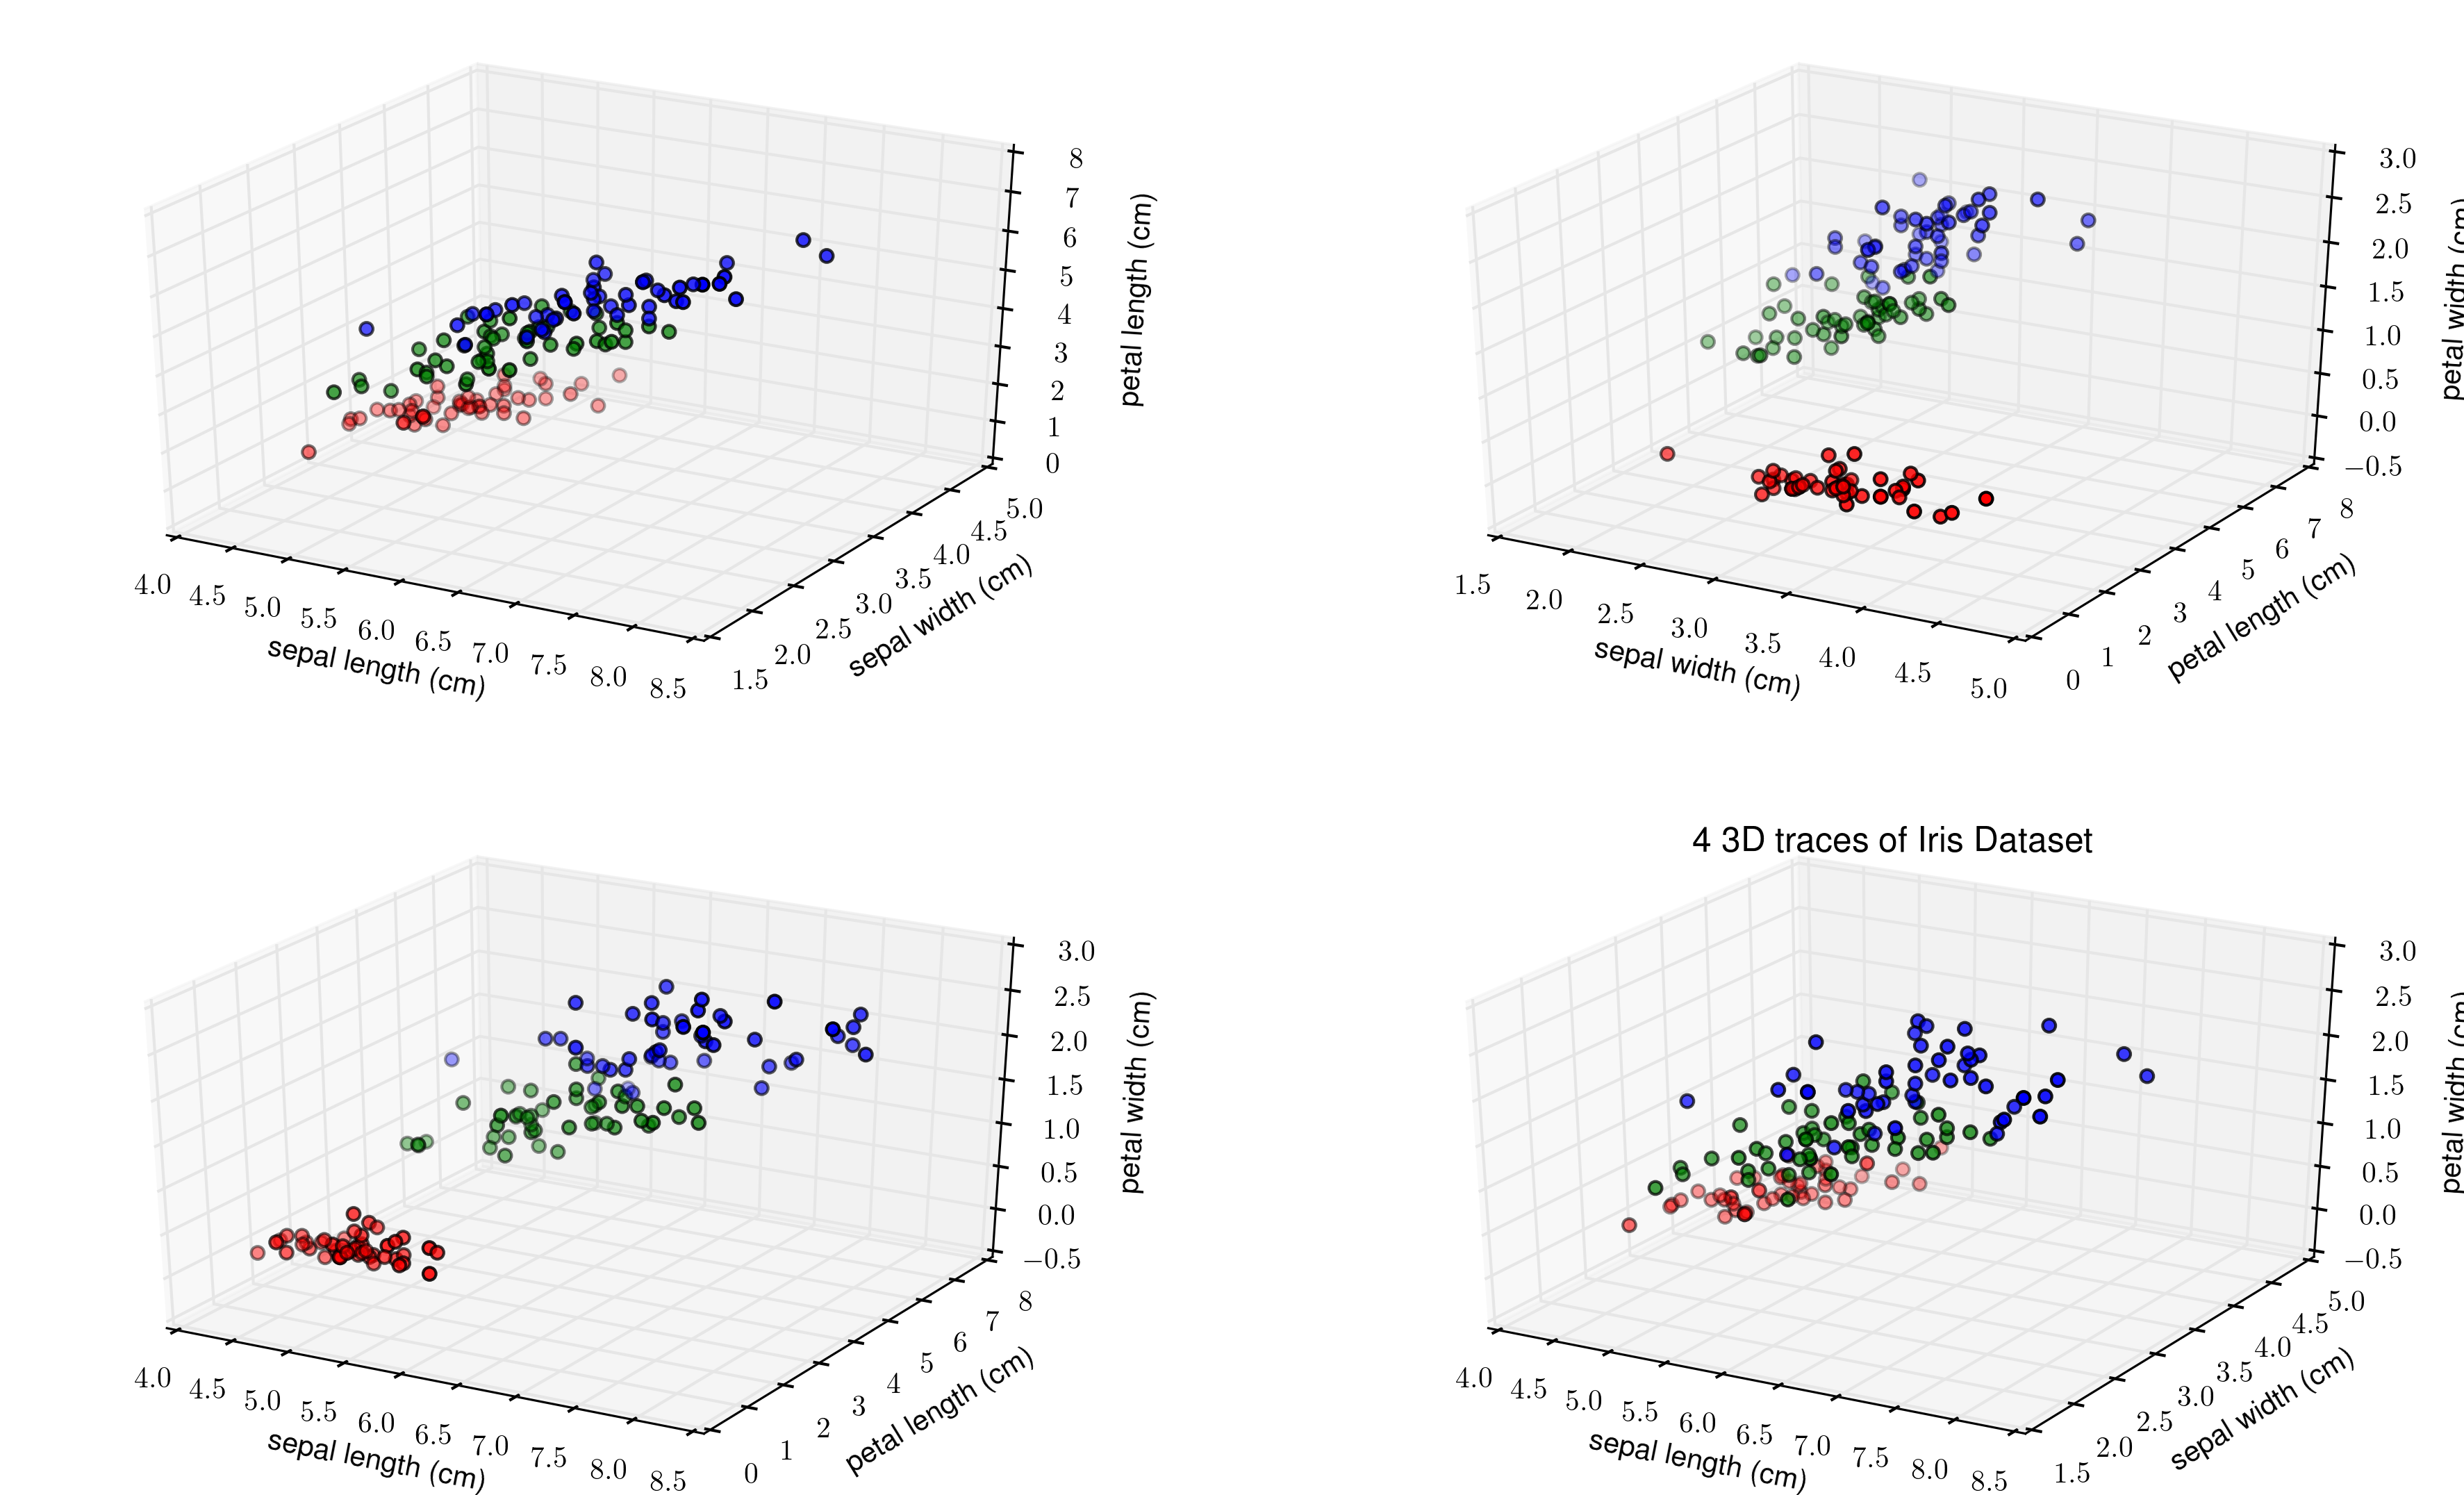

In [120]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

gs = GridSpec(2,2)

for ind, data, feature_labels in zip(range(len(plot_arrays)), plot_arrays, plot_features):
    ax = plt.subplot(gs[ind // 2, ind % 2], projection = '3d')
    ax.scatter(*tuple(data), c=color_labels)
    
    label_funcs = [ax.set_xlabel, ax.set_ylabel, ax.set_zlabel]
    for label_func, label in zip(label_funcs, feature_labels):
        label_func(label)
        
        
plt.title('4 3D traces of Iris Dataset')
plt.legend()

## Linear Algebra

In [ ]:
# Going to do PCA by hand here in AM